# **ChatBot Description:**

 RetailBot is a versatile chatbot designed for retail services. It can recommend products by category or price range, track the status of customer orders, and provide information about available product categories. The chatbot uses interrupt functionality and long and short-term memory. By remembering past conversations, this chatbot offers a more tailored and engaging shopping experience, adapting to individual customer preferences.

In [10]:
%%capture  --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph trustcall

In [ ]:
import os
from google.colab import userdata

%env GOOGLE_API_KEY = {userdata.get('GEMINI_API_KEY')}
%env LANGCHAIN_API_KEY = {userdata.get('LANGCHAIN_API_KEY')}
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "retailbot-project"

# **recommend_products Function:**

**Purpose:** Suggests a list of products filtered by category or randomly from the entire catalog if no category is provided.

**Implementation:** Filters the products catalog based on the provided category. If no category is given, it uses the full product list. Then, it selects a random subset of products, up to the number requested.

**Output:** Returns a list of randomly chosen product dictionaries, with a maximum size of num_recommendations.

In [ ]:
import random
from typing import Optional, List, Dict, Any

# Simulated product catalog
products = [
    {"id": 1, "name": "Laptop", "category": "Electronics"},
    {"id": 2, "name": "Smartphone", "category": "Electronics"},
    {"id": 3, "name": "Headphones", "category": "Accessories"},
    {"id": 4, "name": "Shirt", "category": "Clothing"},
    {"id": 5, "name": "Jacket", "category": "Clothing"},
    {"id": 6, "name": "Sneakers", "category": "Footwear"},
    {"id": 7, "name": "Washing Machine", "category": "Appliances"},
    {"id": 8, "name": "Refrigerator", "category": "Appliances"},
    {"id": 9, "name": "Blender", "category": "Kitchen"},
    {"id": 10, "name": "Microwave", "category": "Kitchen"},
    {"id": 11, "name": "Running Shoes", "category": "Footwear"},
    {"id": 12, "name": "Gaming Console", "category": "Gaming"},
    {"id": 13, "name": "Game Controller", "category": "Gaming"},
    {"id": 14, "name": "Earrings", "category": "Jewelry"},
    {"id": 15, "name": "Necklace", "category": "Jewelry"},
]

def recommend_products(category: Optional[str] = None, num_recommendations: int = 6) -> List[Dict[str, Any]]:
    """
    Recommends products based on category or randomly if no category is provided.
    """
    if category:
        filtered_products = [p for p in products if p["category"].lower() == category.lower()]
    else:
        filtered_products = products  # Recommend from all products

    # Pick random products up to the requested number
    recommendations = random.sample(filtered_products, min(num_recommendations, len(filtered_products)))

    return recommendations

# Example usage
print("Recommendations for Electronics:")
print(recommend_products(category="Electronics"))

print("\nRecommendations for Kitchen:")
print(recommend_products(category="Kitchen"))

print("\nRecommendations for Gaming:")
print(recommend_products(category="Gaming"))

# **product_price Function**

**Purpose:** Filters and recommends items from the items list that are within a specified price limit.

**Implementation:** Iterates over the items list to find products where the item_price is less than the provided price_limit. If no items match, it displays a message indicating no available products for the given price range.

**Output:** Returns a list of dictionaries for products within the specified price range or an empty list if no matches are found.

# **place_order Function**

**Purpose:** Places an order for a product for the user.




In [ ]:
from langgraph.types import Command,interrupt
items = [
    {'name': "Laptop", 'item_price': 300},
    {'name': "Smartphone", 'item_price': 350},
    {'name': "Headphones", 'item_price': 150},
    {'name': "Shirt", 'item_price': 80},
    {'name': "Jacket", 'item_price': 180},
    {'name': "Sneakers", 'item_price': 200},
    {'name': "Washing Machine", 'item_price': 500},
    {'name': "Refrigerator", 'item_price': 700},
    {'name': "Blender", 'item_price': 120},
    {'name': "Microwave", 'item_price': 250},
    {'name': "Running Shoes", 'item_price': 220},
    {'name': "Gaming Console", 'item_price': 400},
    {'name': "Game Controller", 'item_price': 60},
    {'name': "Earrings", 'item_price': 300},
    {'name': "Necklace", 'item_price': 450},
]

def product_price(price_limit: int):
    """ Recommend items based on price_limit if user asked about price range """
    recommended = [product for product in items if product['item_price'] < price_limit]
    if not recommended:
        print("We don't have products for that price range.")
    return recommended

# Example usage
under_300 = product_price(300)
under_400 = product_price(400)

print("\nItems under $300:", under_300)
print("Items under $400:", under_400)

def place_order(product_name:str,address:str):
  """
  Place an order for a product
  """
  order=[item for item in items if item["name"] == product_name]
  if not order:
    print("Sorry, we don't have this item.")

  if order:
    print("Please check your order for final confirmation")
    return interrupt(order)

  if address:
    return
    print("Your order is placed")
  else:
    print("Please provide the shipping Address")




# **track_order Function:**

**Purpose:** Retrieves the status and details of an order based on the provided order_id.

**Implementation:** Checks if the order_id exists in the orders dictionary. If found, it returns the corresponding order's status and details; otherwise, it returns an error message.

**Output:** Returns a dictionary with the order's status and details, or a "Not Found" response if the ID is invalid.


In [ ]:
# Simulated order tracking system
orders = {
    "ORD123": {"status": "Shipped", "details": "Expected delivery in 3 days"},
    "ORD124": {"status": "Processing", "details": "Your order is being prepared"},
    "ORD125": {"status": "Delivered", "details": "Order delivered on Dec 10, 2024"},
    "ORD126": {"status": "Cancelled", "details": "Order was cancelled by the user"},
    "ORD127": {"status": "Returned", "details": "Item returned and refund initiated"},
}

def track_order(order_id: str):
    """
    Tracks the order status using the order ID.
    """
    if order_id in orders:
        return orders[order_id]
    else:
        return {"status": "Not Found", "details": "Invalid Order ID. Please check again."}

# Example usage
print("\nTracking Order ID 'ORD123':")
print(track_order("ORD123"))

print("\nTracking Order ID 'ORD124':")
print(track_order("ORD124"))

print("\nTracking Order ID 'ORD126':")
print(track_order("ORD126"))

print("\nTracking Order ID 'ORD127':")
print(track_order("ORD127"))

# **get_categories Function:**
**Purpose:** Extracts all distinct product categories from the products catalog.

**Implementation:** Uses a set comprehension to eliminate duplicates and then sorts the categories alphabetically.

**Output:** Returns a list of unique and sorted category names as strings.

# **handle_message Function:**
**Purpose:** Interprets user messages and provides appropriate responses based on the content of the message.

**Logic:** Checks for specific keywords like "categories" or "recommend" in the message to decide the response.


*   If "categories" is mentioned, it calls get_categories to list available product categories.

*   If "recommend" is mentioned, it parses the message to identify a category and provides recommendations using the recommend_products function.


**Fallback Response:** If the message doesn't match any expected pattern, it returns a clarification prompt.

In [ ]:
# Function to get distinct categories from the product catalog
def get_categories() -> List[str]:
    """
    Retrieves a list of distinct product categories.
    """
    return sorted(set(product["category"] for product in products))

# Add handling for category-related queries
def handle_message(message: str) -> str:
    """
    Handles user messages and provides appropriate responses.
    """
    if "categories" in message.lower():
        categories = get_categories()
        return f"We offer products in the following categories: {', '.join(categories)}."
    elif "recommend" in message.lower():
        category = message.split("for")[-1].strip()
        recommendations = recommend_products(category=category)
        return f"Here are some recommendations for {category}: {recommendations}"
    else:
        return "I'm sorry, I didn't understand your request. Can you please clarify?"

# Example usage
user_message = "Can you please provide me the categories"
response = handle_message(user_message)
print(response)


In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI

tools=[recommend_products,track_order,product_price, get_categories, handle_message,place_order]

llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

llm_with_tools=llm.bind_tools(tools)


# Building the Graph:

In [22]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage
from langchain_core.runnables.config import RunnableConfig
from langgraph.store.base import BaseStore
from langchain_core.messages import merge_message_runs
from pydantic import BaseModel,Field
from trustcall import create_extractor
import uuid

class Memory(BaseModel):
    content: str = Field(description="The main content of the memory. For example: User expressed interest in buying the products.")

trustcall_extractor = create_extractor(
    llm_with_tools,
    tools=[Memory],
    tool_choice="Memory",
    enable_inserts=True,
)

MODEL_SYSTEM_MESSAGE = """You are a helpful chatbot. You are designed to be a companion to a user.

Your tasks include recommending products based on categories or price limits.

Your job is providing a list of available product categories.

You also place order for the user, track order statuses, and assists users with any retail-related queries.

You have a long term memory which keeps track of information you learn about the user over time.

Current Memory (may include updated memories from this conversation):

{memory}"""

TRUSTCALL_INSTRUCTION = """Reflect on following interaction.

Use the provided tools to retain any necessary memories about the user.

Use parallel tool calling to handle updates and insertions simultaneously:"""

def assistant(state: MessagesState, config:RunnableConfig, store:BaseStore):

    """Load memories from the store and use them to personalize the chatbot's response."""

    user_id = config["configurable"]["user_id"]

    namespace = ("memories", user_id)
    memories = store.search(namespace)

    info = "\n".join(f"- {mem.value['content']}" for mem in memories)
    system_msg = MODEL_SYSTEM_MESSAGE.format(memory=info)

    response = llm_with_tools.invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": response}

def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and update the memory collection."""

    user_id = config["configurable"]["user_id"]

    namespace = ("memories", user_id)

    existing_items = store.search(namespace)

    tool_name = "Memory"
    existing_memories = ([(existing_item.key, tool_name, existing_item.value)
                          for existing_item in existing_items]
                          if existing_items
                          else None
                        )

    updated_messages = list(merge_message_runs(messages=[SystemMessage(content=TRUSTCALL_INSTRUCTION)] + state["messages"]))

    result = trustcall_extractor.invoke({"messages": updated_messages,
                                        "existing": existing_memories})

    for r, rmeta in zip(result["responses"], result["response_metadata"]):
        store.put(namespace,
                  rmeta.get("json_doc_id", str(uuid.uuid4())),
                  r.model_dump(mode="json"),
            )


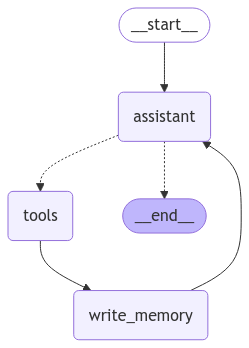

In [23]:
from langgraph.graph import START,StateGraph
from langgraph.prebuilt import tools_condition,ToolNode
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display, Image
from langgraph.store.memory import InMemoryStore

builder: StateGraph = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_node("write_memory",write_memory)

builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition)
builder.add_edge("tools", "write_memory")
builder.add_edge("write_memory","assistant")

across_thread_memory = InMemoryStore()

memory: MemorySaver = MemorySaver()

graph = builder.compile(checkpointer=memory, store=across_thread_memory)


display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

# **Graph Invoke**

In [37]:
config = {"configurable": {"thread_id": "1", "user_id": "2"}}

# User input
input_messages = [HumanMessage(content="Hello")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

Hello again! How can I help you today?


In [38]:
input_messages = [HumanMessage(content="Recommend a product for me")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Recommend a product for me
================================== Ai Message ==================================

Certainly! To give you the best recommendations, could you tell me what kind of product you're looking for, or perhaps a price range you have in mind?  I can also suggest products from specific categories if you prefer.


In [39]:
input_messages = [HumanMessage(content="Can you recommend me a product under $300")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Can you recommend me a product under $300


================================== Ai Message ==================================
Tool Calls:
  product_price (b6ea4c66-d8c5-4bae-9e85-8f124d84f1aa)
 Call ID: b6ea4c66-d8c5-4bae-9e85-8f124d84f1aa
  Args:
    price_limit: 300.0
================================= Tool Message =================================
Name: product_price

[{"name": "Headphones", "item_price": 150}, {"name": "Shirt", "item_price": 80}, {"name": "Jacket", "item_price": 180}, {"name": "Sneakers", "item_price": 200}, {"name": "Blender", "item_price": 120}, {"name": "Microwave", "item_price": 250}, {"name": "Running Shoes", "item_price": 220}, {"name": "Game Controller", "item_price": 60}]
================================== Ai Message ==================================

Here are some products under $300:

* Headphones ($150)
* Shirt ($80)
* Jacket ($180)
* Sneakers ($200)
* Blender ($120)
* Microwave ($250)
* Running Shoes ($220)
* Game Controller ($60)

Do any of those sound interesting to you?  Knowing what category y

In [40]:
input_messages = [HumanMessage(content="I want to place an order for the Microwave")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I want to place an order for the Microwave
================================== Ai Message ==================================

Okay, what is your shipping address? I will need that information to place your order.


# Interrupt Functionality:

In [44]:
input_messages=[HumanMessage(content="Street: 1960 W Ray Rd #7, City/Town	Chandler, State/Province/Region	Arizona, Zip/Postal Code	85224, Phone Number	(480) 814-2820, Country	United States")]

for chunk in graph.stream({"messages":input_messages},config,stream_mode="values"):
  chunk["messages"][-1].pretty_print()



================================ Human Message =================================

Street: 1960 W Ray Rd #7, City/Town	Chandler, State/Province/Region	Arizona, Zip/Postal Code	85224, Phone Number	(480) 814-2820, Country	United States
================================== Ai Message ==================================
Tool Calls:
  place_order (8acb7d4a-eb5b-4def-83ad-883bc35f7958)
 Call ID: 8acb7d4a-eb5b-4def-83ad-883bc35f7958
  Args:
    address: 1960 W Ray Rd #7, Chandler, Arizona 85224, United States
    product_name: Microwave
Please check your order for final confirmation


In [47]:
for event in graph.stream(Command(resume="Requesting to Start"), config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

Great! I've made a note that you're interested in kitchen products.  If you have any questions about kitchen appliances or other kitchen items, or would like some recommendations, feel free to ask.


In [48]:
input_messages = [HumanMessage(content="I am very much interested in kitchen products")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I am very much interested in kitchen products
================================== Ai Message ==================================

Excellent!  I've noted your interest in kitchen products. To give you the best recommendations, are you looking for anything specific right now, or do you want a general overview of the kitchen products we offer?  Knowing your preferences (e.g., small appliances, cookware, bakeware, etc.) would also be helpful.


In [50]:
config = {"configurable": {"thread_id": "2", "user_id": "2"}}

# User input
input_messages = [HumanMessage(content="What product do you recommend me according to my interest?")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

What product do you recommend me according to my interest?
================================== Ai Message ==================================

Based on our previous conversation, you've shown interest in gaming products and kitchen appliances (since you previously ordered a microwave and blender).

Therefore, I recommend you consider:

* **Gaming:** A Game Controller or Gaming Console (as discussed earlier).  To give you more specific recommendations, could you tell me what type of games you enjoy or what platform you prefer (e.g., Playstation, Xbox, PC)?

* **Kitchen:**  Since you already have a microwave and blender, perhaps you might be interested in other small kitchen appliances like a food processor, stand mixer, or coffee maker.  Do any of those sound interesting?


To give you better recommendations, providing more details about your preferences would be helpful.


In [51]:
user_id = "2"
namespace = ("memories", user_id)
memories = across_thread_memory.search(namespace)
for m in memories:
    print(m.dict())

{'namespace': ['memories', '2'], 'key': '7bdfd6ff-dbe9-4d90-b335-ce699522ebf2', 'value': {'content': "User placed an order for a Microwave and a Blender. User's address is 1960 W Ray Rd #7, Chandler, Arizona 85224, United States. Phone number is (480) 814-2820."}, 'created_at': '2025-01-14T10:50:04.503187+00:00', 'updated_at': '2025-01-14T10:50:04.503190+00:00', 'score': None}
